Random하게 80:20으로 분리하고
각 라벨의 비율은 같게 유지하는 방법

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the input data (signals) and output data (labels)
input_data = pd.read_csv('data_original.csv', header=None)
output_data = pd.read_csv('data_output.csv', header=None)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    input_data, 
    output_data, 
    test_size=0.2, 
    random_state=42, 
    stratify=output_data  # Stratified split to maintain label distribution
)

# Verify the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Optional: Save the split data to CSV files if needed
X_train.to_csv('train_input.csv', index=False, header=False)
X_test.to_csv('test_input.csv', index=False, header=False)
y_train.to_csv('train_output.csv', index=False, header=False)
y_test.to_csv('test_output.csv', index=False, header=False)

print("Train and test datasets have been saved.")

Training data shape: (87595, 360)
Testing data shape: (21899, 360)
Train and test datasets have been saved.


Epoch 1/100
2738/2738 [==============================] - 25s 9ms/step - loss: 0.1393 - accuracy: 0.9635 - val_loss: 0.0939 - val_accuracy: 0.9772
Epoch 2/100
2738/2738 [==============================] - 26s 10ms/step - loss: 0.0739 - accuracy: 0.9810 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 3/100
2738/2738 [==============================] - 20s 7ms/step - loss: 0.0550 - accuracy: 0.9853 - val_loss: 0.0529 - val_accuracy: 0.9867
Epoch 4/100
2738/2738 [==============================] - 20s 7ms/step - loss: 0.0447 - accuracy: 0.9881 - val_loss: 0.0601 - val_accuracy: 0.9847
Epoch 5/100
2738/2738 [==============================] - 22s 8ms/step - loss: 0.0375 - accuracy: 0.9894 - val_loss: 0.0465 - val_accuracy: 0.9877
Epoch 6/100
2738/2738 [==============================] - 20s 7ms/step - loss: 0.0319 - accuracy: 0.9907 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 7/100
2738/2738 [==============================] - 18s 7ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0502 

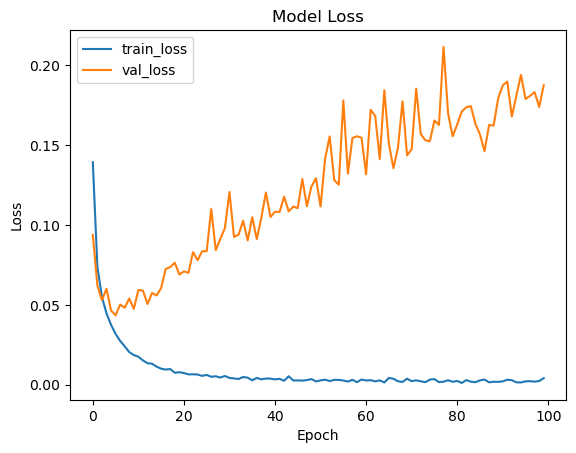

685/685 [==============================] - 4s 5ms/step
              precision    recall  f1-score       support
0              0.873333  0.813665  0.842444    161.000000
1              0.993017  0.996359  0.994685  18126.000000
2              0.996891  0.996271  0.996581   1609.000000
3              0.939271  0.834532  0.883810    556.000000
4              0.967808  0.976503  0.972136   1447.000000
accuracy       0.989589  0.989589  0.989589      0.989589
macro avg      0.954064  0.923466  0.937931  21899.000000
weighted avg   0.989391  0.989589  0.989400  21899.000000


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. 데이터 로드
X_train = pd.read_csv('train_input.csv', header=None)
y_train = pd.read_csv('train_output.csv', header=None)
X_test = pd.read_csv('test_input.csv', header=None)
y_test = pd.read_csv('test_output.csv', header=None)

# 2. 라벨 인코딩 (문자열 -> 숫자)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

# 3. 데이터 형식 변환 (CNN을 위해 3D로 변환)
X_train = np.expand_dims(X_train.values, axis=-1)
X_test = np.expand_dims(X_test.values, axis=-1)

# 4. 원-핫 인코딩 (숫자 -> 원-핫 벡터)
y_train = tf.keras.utils.to_categorical(y_train_encoded)
y_test = tf.keras.utils.to_categorical(y_test_encoded)

# 5. CNN 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# 6. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. 모델 학습
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# 8. 학습 손실(loss) 그래프 그리기
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 9. 예측 수행
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 10. 각 클래스별 정확도 출력
report = classification_report(y_test_classes, y_pred_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Confusion matrix for better understanding
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Display classification report
print(df_report)

# Optional: Save the report to a CSV file
df_report.to_csv('classification_report.csv', index=True)
